In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
class PlotDrawer:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def draw_plots(self):
        os.makedirs("plots", exist_ok=True)
        paths = []

        for column in self.dataframe.columns:
            if self.dataframe[column].dtype != 'float64' and self.dataframe[column].dtype != 'int64':
                continue

            plt.figure(figsize=(10, 6))
            plt.plot(self.dataframe[column])
            plt.title(column)
            plt.xlabel('Index')
            plt.ylabel('Value')

            plot_path = os.path.join("plots", f"{column}_plot.png")
            plt.savefig(plot_path)
            plt.close()

            paths.append(plot_path)

        return paths

    def draw_plots_for_every_row(self):
        os.makedirs("plots_for_row", exist_ok=True)
        paths = []

        for index, row in self.dataframe.iterrows():
            fig, ax = plt.subplots()
            ax.set_title(row['name'])

            # Creating arrays for the X-axis and point values for the Y-axis
            x = np.array([0, 1, 2])
            y = np.array([row['min'], row['mean'], row['max']])
            y_floor = np.array([row['floor_min'], row['floor_mean'], row['floor_max']])
            y_ceiling = np.array([row['ceiling_min'], row['ceiling_mean'], row['ceiling_max']])

            # Adding data series to the plot
            ax.plot(x, y_ceiling, marker='o', label='Ceiling Min, Ceiling Mean, Ceiling Max')
            ax.plot(x, y, marker='o', label='Min, Mean, Max')
            ax.plot(x, y_floor, marker='o', label='Floor Min, Floor Mean, Floor Max')

            ax.set_xticks(x)
            ax.set_xticklabels(['Min', 'Mean', 'Max'])

            ax.legend()

            plot_path = f"plots_for_row/{row['name'].replace('/', '_')}plot.png"
            print(index, plot_path)

            plt.savefig(plot_path)
            plt.close(fig)

            paths.append(plot_path)

        return paths

In [16]:
json_file = "deviation.json"
df = pd.read_json(json_file)
plot_drawer = PlotDrawer(df)

In [17]:
paths_for_general_plots = plot_drawer.draw_plots()

In [18]:
#Creates plots for each row (approximate execution time 350 sec):

#paths_for_plots_for_row = plot_drawer.draw_plots_for_every_row()

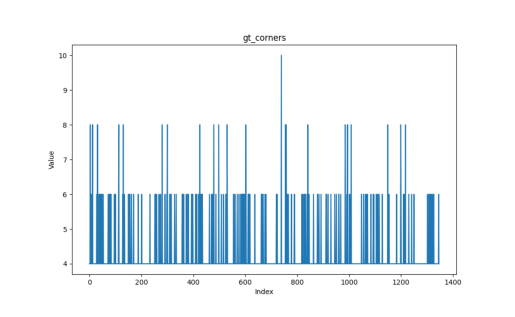

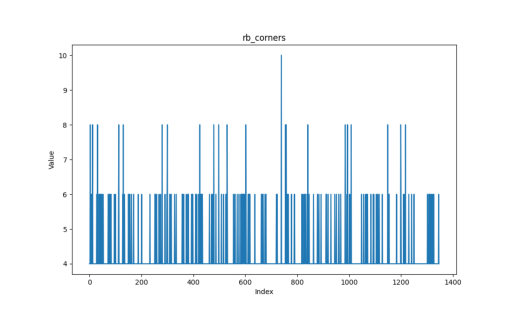

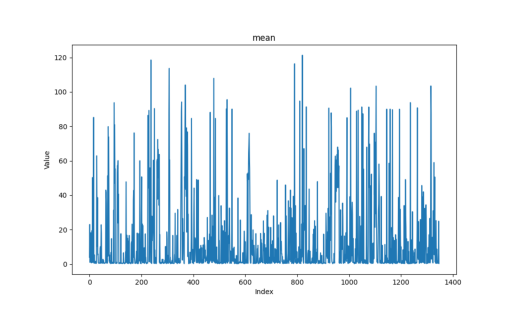

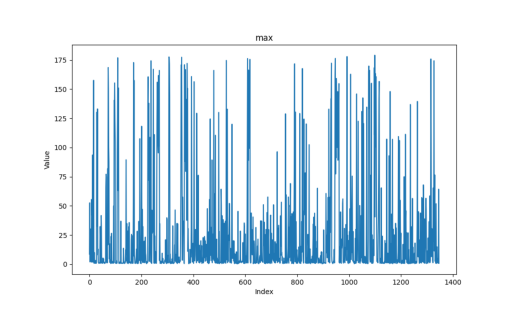

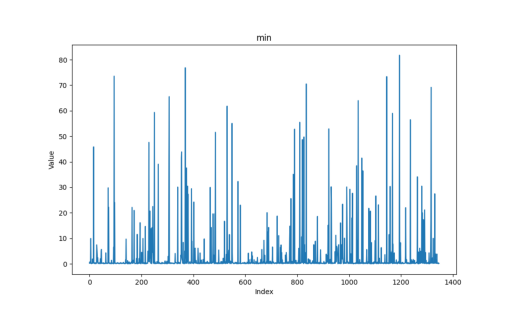

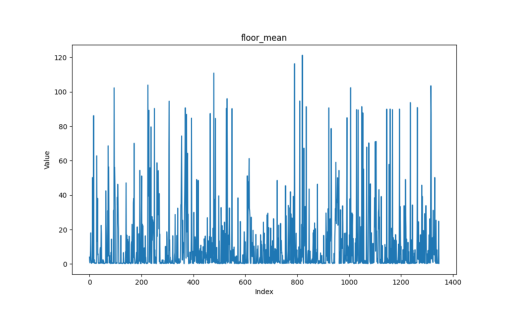

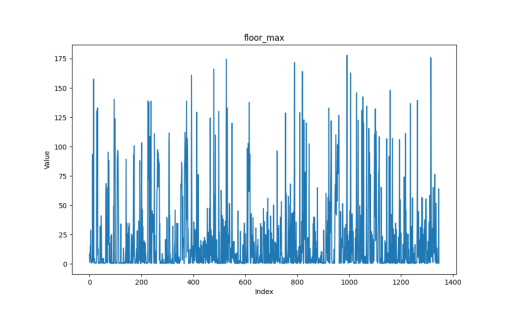

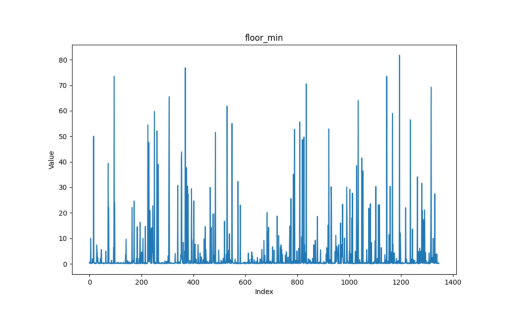

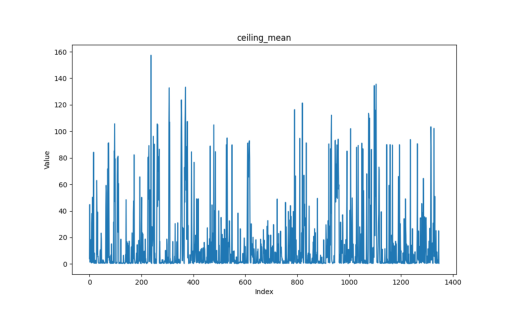

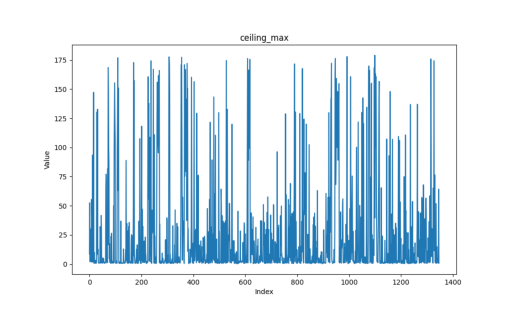

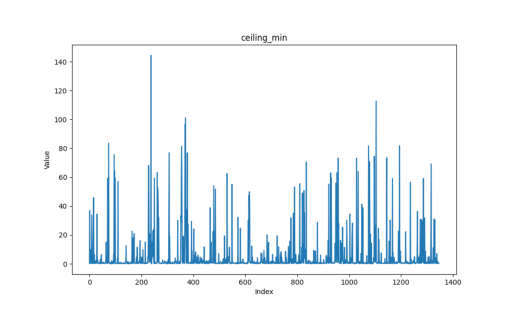

In [21]:
for path in paths_for_general_plots:
    img = plt.imread(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()